In [9]:
import pandas as pd 
import numpy as np 
import os
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
path = "."
fname = os.path.join(path, "edu_imputed.csv")
df = pd.read_csv(fname)
df = df.drop(columns = 'Unnamed: 0')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title,totalyearlycompensation,yearsofexperience,Education,tag,gender,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,...,tag_iOS,gender_Female,gender_Male,gender_Other,tcomp_scaled,yexp_scaled,edu_encoded,row_type,edu_imputed,final_edu_val
0,Software Engineer,78000,4.0,Bachelor's Degree,Full Stack,Male,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.994331,0.095238,3.0,train,NaN,3.0
1,Software Engineer,42000,10.0,Master's Degree,Web Development (Front-End),Male,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.250724,0.238095,4.0,train,NaN,4.0
2,Software Engineering Manager,458000,15.0,Master's Degree,Site Reliability (SRE),Female,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.712039,0.357143,4.0,train,NaN,4.0
3,Software Engineer,163000,10.0,Master's Degree,Distributed Systems (Back-End),Male,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.388958,0.238095,4.0,train,NaN,4.0
4,Software Engineer,120000,6.0,Master's Degree,API Development (Back-End),Female,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.695206,0.142857,4.0,train,NaN,4.0


In [3]:
features = ['title_Business Analyst', 'title_Data Scientist',
       'title_Hardware Engineer', 'title_Human Resources',
       'title_Management Consultant', 'title_Marketing',
       'title_Mechanical Engineer', 'title_Product Designer',
       'title_Product Manager', 'title_Recruiter', 'title_Sales',
       'title_Software Engineer', 'title_Software Engineering Manager',
       'title_Solution Architect', 'title_Technical Program Manager',
       'tag_API Development (Back-End)', 'tag_Android', 'tag_Data',
       'tag_DevOps', 'tag_Distributed Systems (Back-End)', 'tag_Full Stack',
       'tag_ML / AI', 'tag_Mobile (iOS + Android)', 'tag_Networking',
       'tag_Other', 'tag_Production', 'tag_Security',
       'tag_Site Reliability (SRE)', 'tag_Testing (SDET)',
       'tag_Web Development (Front-End)', 'tag_iOS', 'gender_Female',
       'gender_Male', 'gender_Other', 'yexp_scaled', 'final_edu_val']
#features = list(set(features) - set(features_))
target = 'totalyearlycompensation'

y = df[target]
X = df[features].values

In [4]:
np.random.seed(1023)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43088, 36) (10772, 36) (43088,) (10772,)


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [9]:
classifiers = [
    LinearRegression(),
    SGDRegressor(max_iter=1000),
    RandomForestRegressor(),
    GradientBoostingRegressor(random_state=0)    
]
classifier_names = [
    'Linear Regression Regression' ,
    'SDG Regressor',
    'Random Forest Regressor', 
    'Gradient Boosted Regressor'     

]

In [10]:
for clf, clf_name in zip(classifiers, classifier_names):
    time_start = time.time()
    cv_scores = cross_val_score(clf, X, np.ravel(y), cv=5)
    print(clf_name, ' mean accuracy: ',
          round(cv_scores.mean()*100, 3), 
          '% std: ', round(cv_scores.var()*100, 3),'%',
          'training time: ', round(time.time() - time_start, 2), 's'
         )

Linear Regression Regression  mean accuracy:  26.585 % std:  0.33 % training time:  0.38 s
SDG Regressor  mean accuracy:  26.283 % std:  0.302 % training time:  1.08 s
Random Forest Regressor  mean accuracy:  19.372 % std:  2.231 % training time:  40.43 s
Gradient Boosted Regressor  mean accuracy:  28.09 % std:  0.895 % training time:  19.91 s


In [11]:
#use hyper parameter tuning for Gradient Boosted Regressor
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

time_start = time.time()
model = GradientBoostingRegressor()


grid={'min_samples_split': [10,20,30], #Defines the minimum number of samples which are required in a node to be considered for splitting
      'min_samples_leaf':[100,300,500], #Defines the minimum samples (or observations) required in a terminal node or leaf
      'max_depth':[8,10], #The maximum depth of a tree
      'learning_rate':[.1], # controls the magnitude of this change in the estimates
      'subsample':[.8],
      'random_state':[23]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search=GridSearchCV(estimator=model,param_grid=grid,n_jobs=1,cv=cv)
grid_result = grid_search.fit(X, y)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('time taken: ', time.time()-time_start, 's')


C:\Users\adcm172\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\adcm172\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\adcm172\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best: 0.314537 using {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 10, 'random_state': 23, 'subsample': 0.8}
0.314537 (0.013259) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 10, 'random_state': 23, 'subsample': 0.8}
0.314537 (0.013259) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 20, 'random_state': 23, 'subsample': 0.8}
0.314537 (0.013259) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 30, 'random_state': 23, 'subsample': 0.8}
0.312220 (0.013458) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 300, 'min_samples_split': 10, 'random_state': 23, 'subsample': 0.8}
0.312220 (0.013458) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 300, 'min_samples_split': 20, 'random_state': 23, 'subsample': 0.8}
0.312220 (0.013458) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 30

Best: 0.314537 using {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 10, 'random_state': 23, 'subsample': 0.8}

In [17]:
## Gradient Boosted Regressor

In [7]:
def display_results(y_pred, y_test):
    print("Predicted 1-5:", np.array([round(y_pred[x][0]) for x in range(0,len(y_pred))][0:10]))
    print("Actual 1-5:", y_test[0:10].values)
    print("Difference: ", np.array([round(y_pred[x][0]) for x in range(0,len(y_pred))][0:10]) - np.array(y_test[0:10].values))
    print('RMSE: ', np.sqrt(mean_absolute_error(y_test, y_pred)))
    print('MAE: ', mean_absolute_error(y_test, y_pred) )
    print('R-squared: ', r2_score(y_test, y_pred) )


In [10]:
time_start = time.time()
gbrm = GradientBoostingRegressor(learning_rate=0.1, max_depth= 8, min_samples_leaf = 100, 
                                 min_samples_split = 10, 
                                  random_state = 23, subsample= 0.8) 
gbrm.fit(X_train, np.ravel(y_train))
print('time taken: ', time.time()-time_start, 's')
y_pred = np.array([[x] for x in gbrm.predict(X_test)])
display_results(y_pred, y_test)


time taken:  16.273678064346313 s
Predicted 1-5: [226882 230524 429566 139696 204170 226634 213542 189320 162491 200684]
Actual 1-5: [181000 240000 600000  40000 230000 330000 280000 189000 127000 271000]
Difference:  [  45882   -9476 -170434   99696  -25830 -103366  -66458     320   35491
  -70316]
RMSE:  272.32159507583384
MAE:  74159.05114464642
R-squared:  0.34017585156212704


In [45]:
pred_error = y_test - np.array([round(y_pred[x][0]) for x in range(0,len(y_pred))])

Text(0, 0.5, 'Frequency')

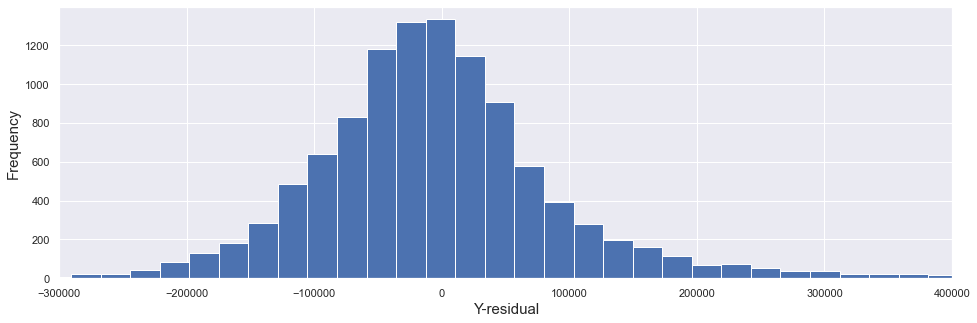

In [52]:
fig = plt.figure(figsize=(16,5))                                  
residuals_hist = plt.hist(pred_error, bins = 100)
plt.xlim([-300000, 400000])
plt.xlabel("Y-residual", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

## Neural Network using Tensorflow

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam


from math import sqrt

In [54]:
tf.__version__

'2.3.0'

### Try different configs 

In [55]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(200, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(50, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [56]:
history = model.fit(X_train, y_train, batch_size=50, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
690/690 [==============================] - 2s 2ms/step - loss: 33197242368.0000 - mean_squared_error: 33197242368.0000 - val_loss: 19625504768.0000 - val_mean_squared_error: 19625504768.0000
Epoch 2/50
690/690 [==============================] - 1s 2ms/step - loss: 16174977024.0000 - mean_squared_error: 16174977024.0000 - val_loss: 18468020224.0000 - val_mean_squared_error: 18468020224.0000
Epoch 3/50
690/690 [==============================] - 1s 2ms/step - loss: 15348671488.0000 - mean_squared_error: 15348671488.0000 - val_loss: 17845026816.0000 - val_mean_squared_error: 17845026816.0000
Epoch 4/50
690/690 [==============================] - 2s 2ms/step - loss: 14874204160.0000 - mean_squared_error: 14874204160.0000 - val_loss: 17463562240.0000 - val_mean_squared_error: 17463562240.0000
Epoch 5/50
690/690 [==============================] - 1s 2ms/step - loss: 14565082112.0000 - mean_squared_error: 14565082112.0000 - val_loss: 17176201216.0000 - val_mean_squared_error: 1717620

Epoch 40/50
690/690 [==============================] - 1s 2ms/step - loss: 13648648192.0000 - mean_squared_error: 13648648192.0000 - val_loss: 16242915328.0000 - val_mean_squared_error: 16242915328.0000
Epoch 41/50
690/690 [==============================] - 2s 2ms/step - loss: 13642001408.0000 - mean_squared_error: 13642001408.0000 - val_loss: 16209790976.0000 - val_mean_squared_error: 16209790976.0000
Epoch 42/50
690/690 [==============================] - 1s 2ms/step - loss: 13625159680.0000 - mean_squared_error: 13625159680.0000 - val_loss: 16198816768.0000 - val_mean_squared_error: 16198816768.0000
Epoch 43/50
690/690 [==============================] - 1s 2ms/step - loss: 13626006528.0000 - mean_squared_error: 13626006528.0000 - val_loss: 16201101312.0000 - val_mean_squared_error: 16201101312.0000
Epoch 44/50
690/690 [==============================] - 1s 2ms/step - loss: 13614959616.0000 - mean_squared_error: 13614959616.0000 - val_loss: 16270222336.0000 - val_mean_squared_error: 16

In [57]:
print ("Model train metrics:")
pred_train = model.predict(X_train)
display_results(pred_train, y_train)

print("Model test metrics:")
pred_test = model.predict(X_test)
display_results(pred_test, y_test)

Model train metrics:
Predicted 1-5: [197855 332140 197588 273104 179572 429327 154333 336681 251824 291126]
Actual 1-5: [121000 400000 240000 415000  59000 340000 230000 363000 132000 184000]
Difference:  [  76855  -67860  -42412 -141896  120572   89327  -75667  -26319  119824
  107126]
RMSE:  275.1569296605479
MAE:  75711.33594021972
R-squared:  0.29698219387860003
Model test metrics:
Predicted 1-5: [233767 214636 412718 136628 212334 243765 219051 178748 166068 188400]
Actual 1-5: [181000 240000 600000  40000 230000 330000 280000 189000 127000 271000]
Difference:  [  52767  -25364 -187282   96628  -17666  -86235  -60949  -10252   39068
  -82600]
RMSE:  273.31057745437175
MAE:  74698.67174844214
R-squared:  0.3258072269447003


In [58]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01

# build the model
model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
539/539 [==============================] - 3s 6ms/step - loss: 1.8728 - mean_squared_logarithmic_error: 1.8716 - val_loss: 0.2908 - val_mean_squared_logarithmic_error: 0.2914
Epoch 2/50
539/539 [==============================] - 3s 6ms/step - loss: 0.2876 - mean_squared_logarithmic_error: 0.2876 - val_loss: 0.2790 - val_mean_squared_logarithmic_error: 0.2795
Epoch 3/50
539/539 [==============================] - 3s 6ms/step - loss: 0.2826 - mean_squared_logarithmic_error: 0.2826 - val_loss: 0.2768 - val_mean_squared_logarithmic_error: 0.2773
Epoch 4/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2801 - mean_squared_logarithmic_error: 0.2803 - val_loss: 0.2750 - val_mean_squared_logarithmic_error: 0.2756
Epoch 5/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2805 - mean_squared_logarithmic_error: 0.2804 - val_loss: 0.2787 - val_mean_squared_logarithmic_error: 0.2792
Epoch 6/50
539/539 [==============================] - 3s 6ms/step - lo

Epoch 45/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2714 - mean_squared_logarithmic_error: 0.2715 - val_loss: 0.2675 - val_mean_squared_logarithmic_error: 0.2680
Epoch 46/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2715 - mean_squared_logarithmic_error: 0.2719 - val_loss: 0.2668 - val_mean_squared_logarithmic_error: 0.2673
Epoch 47/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2705 - mean_squared_logarithmic_error: 0.2704 - val_loss: 0.2708 - val_mean_squared_logarithmic_error: 0.2713
Epoch 48/50
539/539 [==============================] - 2s 5ms/step - loss: 0.2702 - mean_squared_logarithmic_error: 0.2701 - val_loss: 0.2696 - val_mean_squared_logarithmic_error: 0.2701
Epoch 49/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2704 - mean_squared_logarithmic_error: 0.2704 - val_loss: 0.2677 - val_mean_squared_logarithmic_error: 0.2682
Epoch 50/50
539/539 [==============================] - 2s 5ms/ste

In [59]:
print ("Model train metrics:")
pred_train = model.predict(X_train)
display_results(pred_train, y_train)

print("Model test metrics:")
pred_test = model.predict(X_test)
display_results(pred_test, y_test)

Model train metrics:
Predicted 1-5: [182573 304690 145530 241501 148077 379063 132973 297463 239136 263130]
Actual 1-5: [121000 400000 240000 415000  59000 340000 230000 363000 132000 184000]
Difference:  [  61573  -95310  -94470 -173499   89077   39063  -97027  -65537  107136
   79130]
RMSE:  273.2705140828879
MAE:  74676.77386712586
R-squared:  0.2700727666392668
Model test metrics:
Predicted 1-5: [211481 183012 354341 120763 188300 210809 219812 158198 140230 162107]
Actual 1-5: [181000 240000 600000  40000 230000 330000 280000 189000 127000 271000]
Difference:  [  30481  -56988 -245659   80763  -41700 -119191  -60188  -30802   13230
 -108893]
RMSE:  271.51876949433455
MAE:  73722.44218771758
R-squared:  0.2962179622446227


In [60]:
hidden_units1 = 512
hidden_units2 = 256
hidden_units3 = 128
hidden_units4 = 256
hidden_units5 = 128
learning_rate = 0.1

# build the model
model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
   Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
   # Dense(hidden_units4, kernel_initializer='normal', activation='relu'),
   # Dropout(0.2),
    #Dense(hidden_units5, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
539/539 [==============================] - 3s 6ms/step - loss: 0.8003 - mean_squared_logarithmic_error: 0.8000 - val_loss: 0.2871 - val_mean_squared_logarithmic_error: 0.2877
Epoch 2/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2953 - mean_squared_logarithmic_error: 0.2953 - val_loss: 0.2835 - val_mean_squared_logarithmic_error: 0.2840
Epoch 3/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2923 - mean_squared_logarithmic_error: 0.2922 - val_loss: 0.2755 - val_mean_squared_logarithmic_error: 0.2760
Epoch 4/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2934 - mean_squared_logarithmic_error: 0.2934 - val_loss: 0.2767 - val_mean_squared_logarithmic_error: 0.2772
Epoch 5/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2952 - mean_squared_logarithmic_error: 0.2951 - val_loss: 0.2834 - val_mean_squared_logarithmic_error: 0.2839
Epoch 6/50
539/539 [==============================] - 3s 5ms/step - lo

Epoch 45/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2913 - mean_squared_logarithmic_error: 0.2915 - val_loss: 0.2765 - val_mean_squared_logarithmic_error: 0.2770
Epoch 46/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2875 - mean_squared_logarithmic_error: 0.2875 - val_loss: 0.2830 - val_mean_squared_logarithmic_error: 0.2834
Epoch 47/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2895 - mean_squared_logarithmic_error: 0.2896 - val_loss: 0.2691 - val_mean_squared_logarithmic_error: 0.2696
Epoch 48/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2912 - mean_squared_logarithmic_error: 0.2912 - val_loss: 0.2753 - val_mean_squared_logarithmic_error: 0.2758
Epoch 49/50
539/539 [==============================] - 3s 5ms/step - loss: 0.2875 - mean_squared_logarithmic_error: 0.2874 - val_loss: 0.2716 - val_mean_squared_logarithmic_error: 0.2721
Epoch 50/50
539/539 [==============================] - 3s 5ms/ste

In [61]:
print ("Model train metrics:")
pred_train = model.predict(X_train)
display_results(pred_train, y_train)

print("Model test metrics:")
pred_test = model.predict(X_test)
display_results(pred_test, y_test)

Model train metrics:
Predicted 1-5: [164959 259365 148374 209981 133913 332664 119238 234970 205565 210972]
Actual 1-5: [121000 400000 240000 415000  59000 340000 230000 363000 132000 184000]
Difference:  [  43959 -140635  -91626 -205019   74913   -7336 -110762 -128030   73565
   26972]
RMSE:  282.49840264594195
MAE:  79805.34749750873
R-squared:  0.16887485392407953
Model test metrics:
Predicted 1-5: [189799 181792 322800 104537 153813 224670 187166 153168 132415 142552]
Actual 1-5: [181000 240000 600000  40000 230000 330000 280000 189000 127000 271000]
Difference:  [   8799  -58208 -277200   64537  -76187 -105330  -92834  -35832    5415
 -128448]
RMSE:  281.0376238555692
MAE:  78982.14602238442
R-squared:  0.18492997626660213
